In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('spam.csv' , encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
#drop last three columns
drop_data = data.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis = 1)
drop_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
drop_data.shape


(5572, 2)

In [5]:
#rename the columns to logical ones
drop_data.rename(columns = {'v1' : 'target' , 'v2' : 'text'} , inplace = True)
drop_data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


 LabelEncoder from sklearn.preprocessing to convert categorical labels in the target column of drop_data into numerical values.

 Encoder = Labelencoder() , instance of the label encoder.

 fit_transform() does two things:
 - fit(): Learns unique categorical values and assigns a numeric label to each unique value.
 - transform(): Converts all categorical values into the corresponding numeric labels.

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
drop_data['target'] = encoder.fit_transform(drop_data['target'])
drop_data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
drop_data.isnull().sum()

,0
target,0
text,0


In [8]:
drop_data.duplicated().sum()

403

In [9]:
# This removes duplicate rows from the drop_data DataFrame while keeping the first occurrence of each duplicate row.
drop_data = drop_data.drop_duplicates(keep = 'first')


In [10]:
drop_data.duplicated().sum()

0

In [11]:
drop_data.shape

(5169, 2)

# **EDA**

In [12]:
drop_data['target'].value_counts()

,count
target,
0,4516
1,653


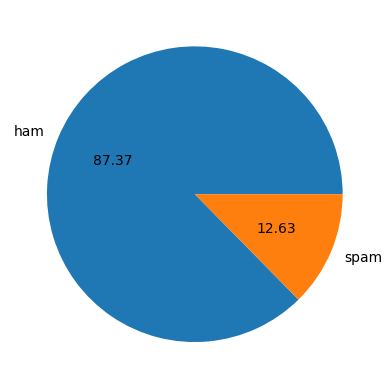

In [13]:
import matplotlib.pyplot as plt
plt.pie(drop_data['target'].value_counts() , labels = ['ham' , 'spam'] , autopct = '%0.2f')
plt.show()

Data is imbalanced

In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

.apply(len):
- Applies len() to each row, counting the number of characters in each text entry.

In [15]:

drop_data['num_characters']= drop_data['text'].apply(len)

In [16]:
drop_data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:

drop_data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

,text
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [18]:
drop_data['num_words']= drop_data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
drop_data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
drop_data['num_sentences']= drop_data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
drop_data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
drop_data[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


One sentence has max characters  as 910, words 220 and sentences 38
- mean means avg charcters words sentences used , we can see roughly 2 sentnces are used , 18 words and 78 characters .


lets analyze ham and spam sperately

In [23]:
#for ham
drop_data[drop_data['target']== 0 ][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#for spam
drop_data[drop_data['target']== 1 ][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Comparing the mean of spam and ham we can see there is a difference between them , spam is bigger ie more senteces characters used.


lets see this using histogram

Most messages are short (large blue bars on the left side, under 100 characters).

This means that most ham messages are typically short.
Spam messages (red bars) tend to be longer than ham messages.

The red bars peak around 150-200 characters, meaning spam messages tend to have higher character lengths.


Since spam messages are generally longer than ham messages, message length could be a useful feature in a spam detection model.

<Axes: xlabel='num_characters', ylabel='Count'>

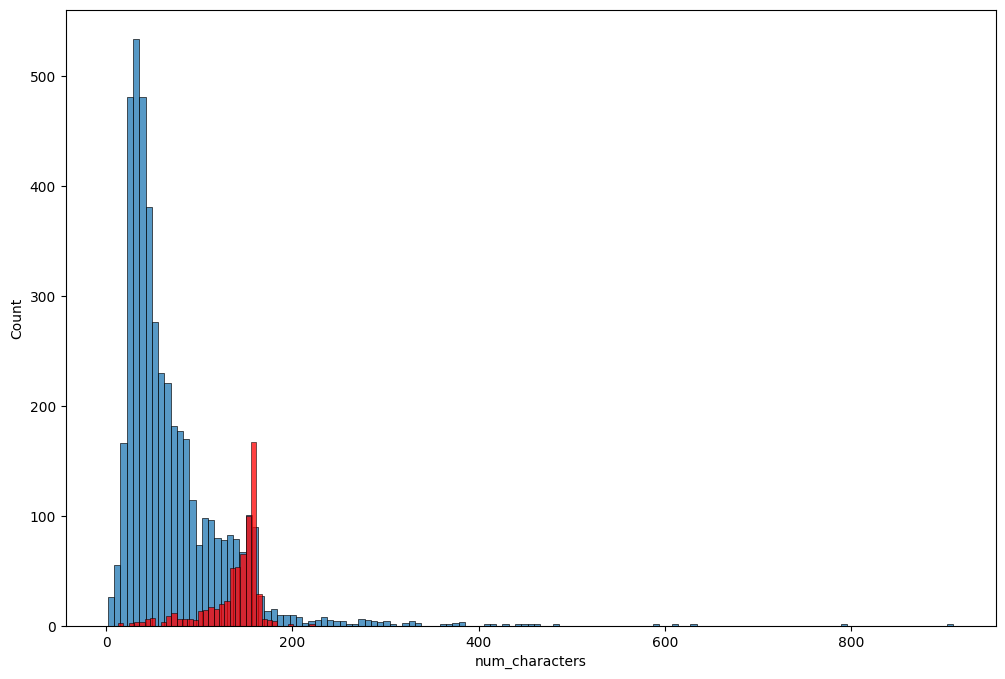

In [25]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.histplot(drop_data[drop_data['target']== 0 ]['num_characters'])
sns.histplot(drop_data[drop_data['target']== 1 ]['num_characters'], color = 'red') #spam



<Axes: xlabel='num_words', ylabel='Count'>

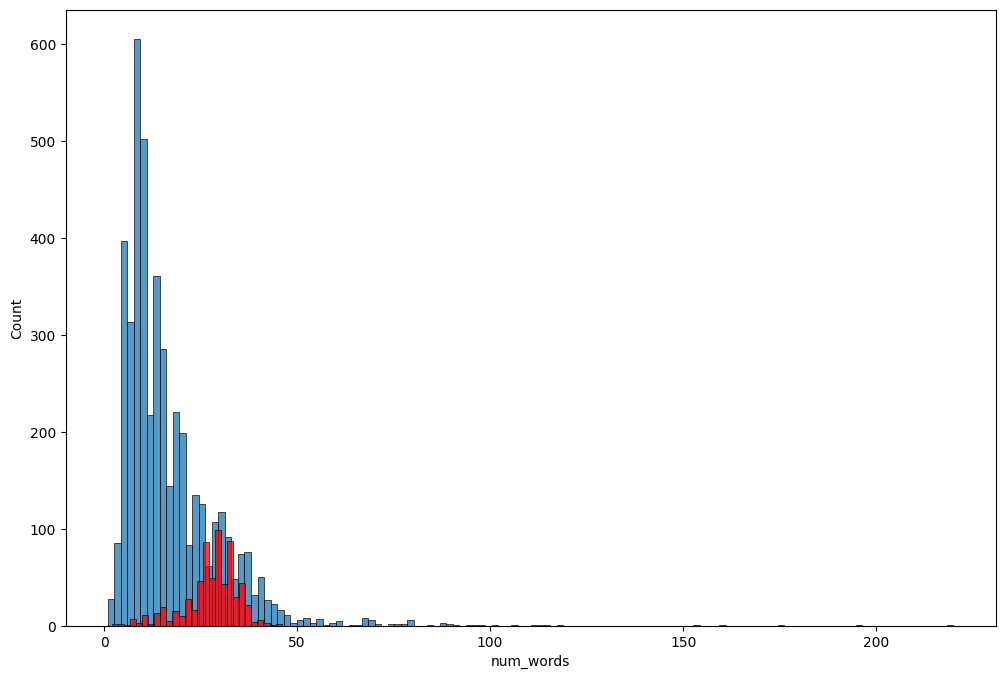

In [26]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.histplot(drop_data[drop_data['target']== 0 ]['num_words'])
sns.histplot(drop_data[drop_data['target']== 1 ]['num_words'], color = 'red') #spam


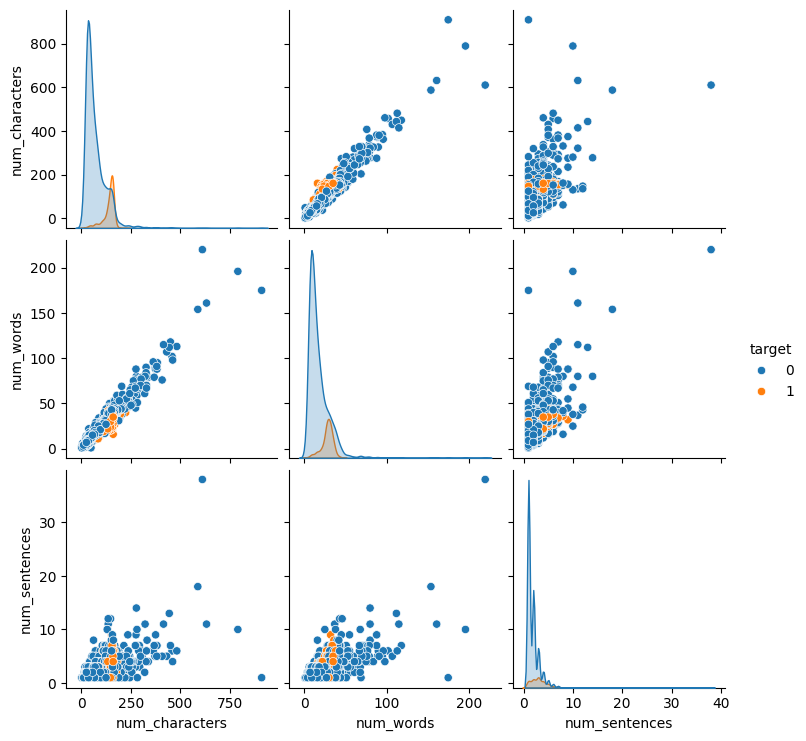

In [27]:
sns.pairplot(drop_data , hue = 'target')


First row (num_characters)
1. num_characters vs. num_characters (Diagonal Plot)

 - KDE plot showing the distribution of character count.
2. num_characters vs. num_words

 - Strong linear relationship, indicating that messages with more characters tend to have more words.But there are outliers.
3. num_characters vs. num_sentences

 - Weak correlation, suggesting that the number of characters doesn't always determine the number of sentences.

 Second row (num_words)
1. num_words vs. num_characters

 - Again, strong correlation, showing that messages with more words also have more characters.
2. num_words vs. num_words (Diagonal Plot)

 - KDE plot showing the distribution of word count.
3. num_words vs. num_sentences

 - A moderate correlation, as more words tend to indicate longer messages with more sentences.

The corr() method only works with numeric data because correlation calculations involve mathematical operations that cannot be performed on text or categorical values.


If drop_data contains text, categorical values, or other non-numeric data, drop_data.corr() will throw an error (like the one you encountered: "could not convert string to float").

<Axes: >

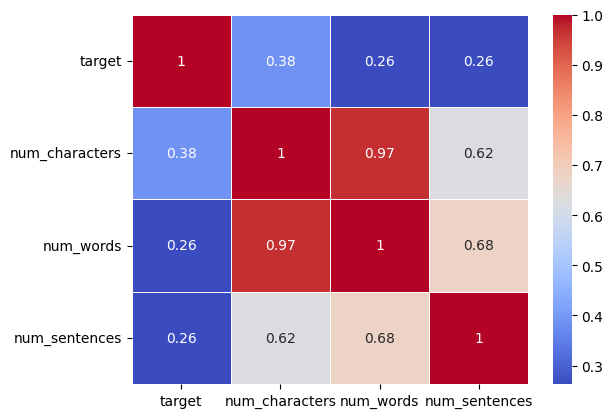

In [28]:
numeric_data = drop_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


Correlation measures the relationship between two variables and ranges from -1 to 1:
 - +1 → Perfect positive correlation (both variables increase together).
 - 0 → No correlation (no relationship).
 - -1 → Perfect negative correlation (one increases, the other decreases).

 The heatmap is color-coded:

 - Red (1.0) → Strong positive correlation.
 -  Blue (0.3 and below) → Weak correlation.
 - White (0.5 - 0.7) → Moderate correlation.

 1. "num_characters" and "num_words" have a very strong correlation (0.97) → This makes sense because longer texts usually have more words.

2. "num_sentences" has a moderate correlation with both "num_characters" (0.62) and "num_words" (0.68) → Longer texts also have more sentences.

# **Data Preprocessing**

In [29]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Ensure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Convert text to lowercase
    text = word_tokenize(text)  # Tokenize text

    y = []

    # Remove non-alphanumeric characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]  # Copy the filtered text
    y.clear()

    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]  # Copy the filtered text again
    y.clear()

    # Apply stemming
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
transform_text('i loved the youtube lectires on machine learning . how about you ')

'love youtub lectir machin learn'

In [31]:
drop_data['transformed_text'] = drop_data['text'].apply(transform_text)

In [32]:
drop_data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Wordcloud for spam

In [33]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = 'white')


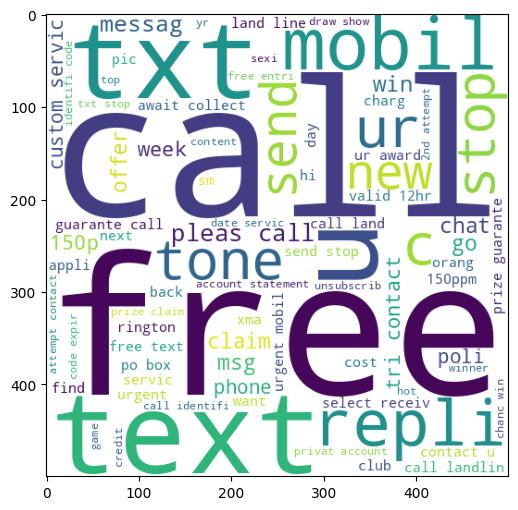

In [34]:
spam_wc = wc.generate(drop_data[drop_data['target']== 1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

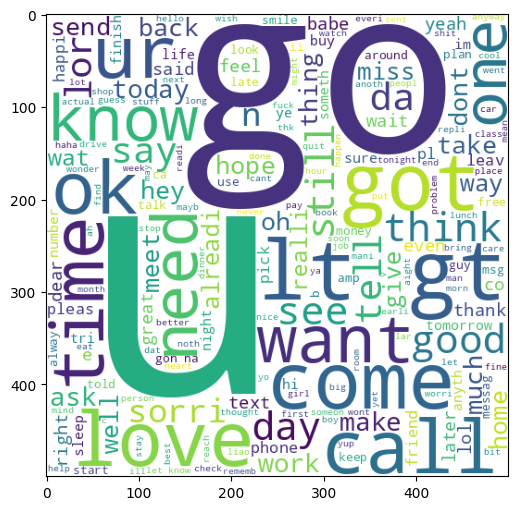

In [35]:
ham_wc = wc.generate(drop_data[drop_data['target']== 0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [36]:
spam_corpus  = []
for msg in drop_data[drop_data['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [37]:
len(spam_corpus)


9939

This code uses Counter from the collections module to count occurrences of elements in spam_corpus and returns the 30 most common ones.

In [38]:
from collections import Counter
spam_counter = Counter(spam_corpus)
pd.DataFrame(spam_counter.most_common(30))
#

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


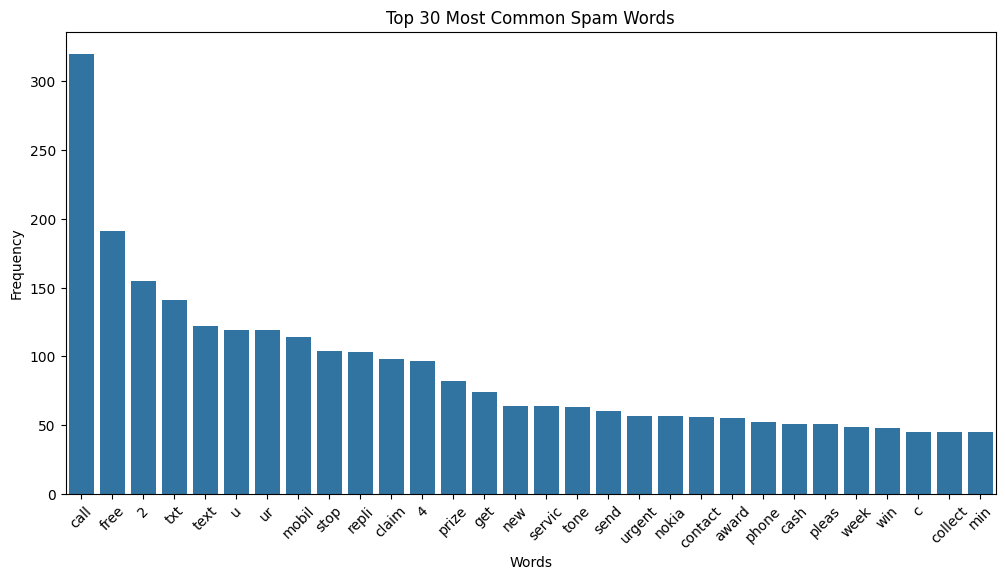

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with default column names (0 and 1)
df = pd.DataFrame(spam_counter.most_common(30))

# Plot using the existing column names
plt.figure(figsize=(12, 6))
sns.barplot(x=df[0], y=df[1])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Spam Words')

# Show the plot
plt.show()


In [40]:
ham_corpus  = []
for msg in drop_data[drop_data['target']==  0 ]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [41]:
from collections import Counter
ham_counter = Counter(ham_corpus)
pd.DataFrame(ham_counter.most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


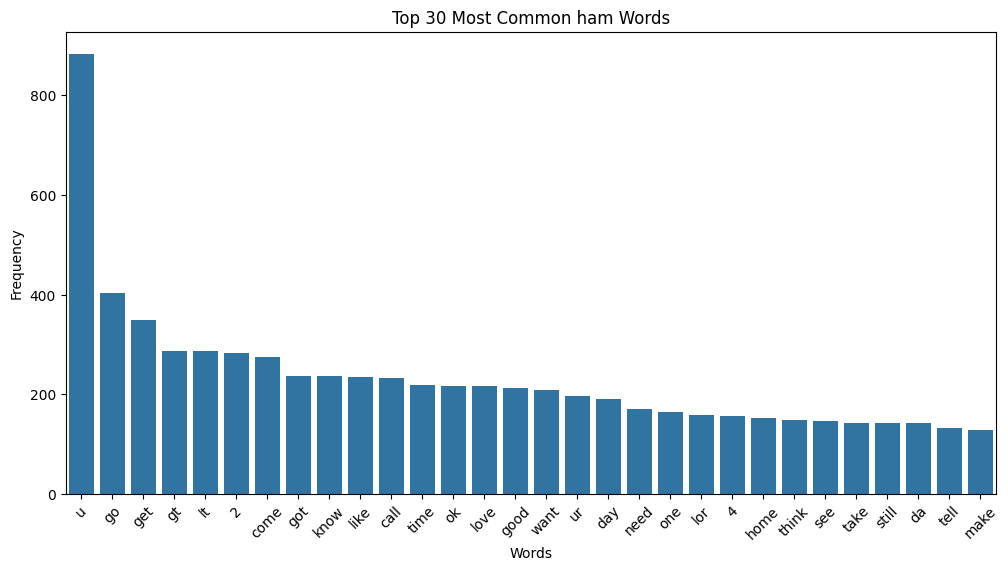

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with default column names (0 and 1)
df = pd.DataFrame(ham_counter.most_common(30))

# Plot using the existing column names
plt.figure(figsize=(12, 6))
sns.barplot(x=df[0], y=df[1])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common ham Words')

# Show the plot
plt.show()

# **Model building**

By default, CountVectorizer:

Builds a vocabulary (a dictionary of unique words).


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


**fit():** Learns the vocabulary (all unique words).

**transform():** Converts text into a frequency matrix.


In [44]:
X = cv.fit_transform(drop_data['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
X.shape

(5169, 6708)

**5169 rows:**
Your dataset contains 5169 text entries (messages after transformation)

**6708 columns:**
CountVectorizer builds a vocabulary from all unique words in your dataset.
You have 6708 unique words across all transformed text entries.

In [46]:
y = drop_data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [50]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [51]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# **Rather using bag of words we will use TFIDf vector**

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features=6708)
#
cv = CountVectorizer()


In [53]:
X = tfidf.fit_transform(drop_data['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
X.shape

(5169, 6708)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [58]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [59]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


We choose Tfidf and then multinomialNb because of its better precision

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,


    'RF': rfc,


    'ETC': etc,


}

in place of clf we will use the model name object

In [69]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [70]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9729206963249516, 0.9741379310344828)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771


In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,RF,0.971954,1.000000
4,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138


In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,KN,Precision,1.000000
6,NB,Precision,1.000000
7,RF,Precision,1.000000
8,ETC,Precision,0.982456
9,SVC,Precision,0.974138


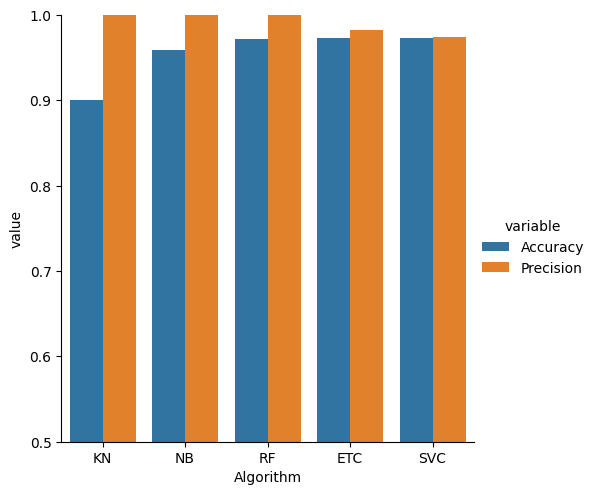

In [76]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='horizontal')
plt.show()

In [77]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))